In [1]:
import pandas as pd
import seaborn as sns # High level statistical visualisation library.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #clustering library
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('/Users/twinklejain/Desktop/Data Analysis Project/Customer Segmentation & Clustering/Mall_Customers.csv')


In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

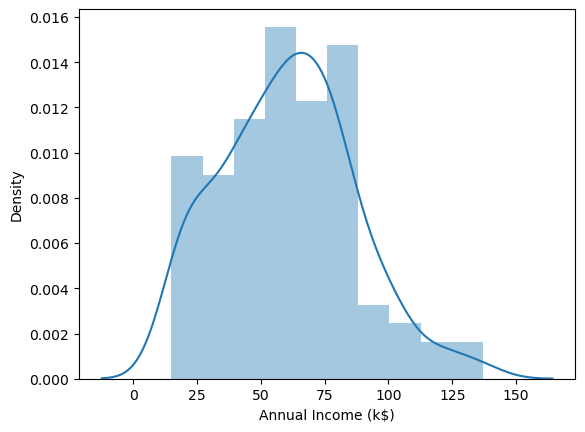

In [5]:
sns.distplot(df['Annual Income (k$)']) #Displays the distribution of annual income values in bins

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

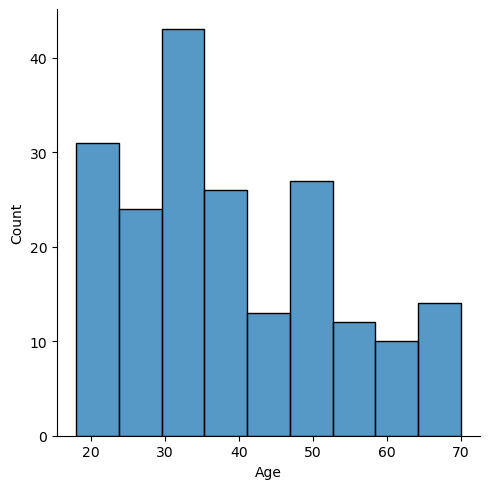

<Figure size 640x480 with 0 Axes>

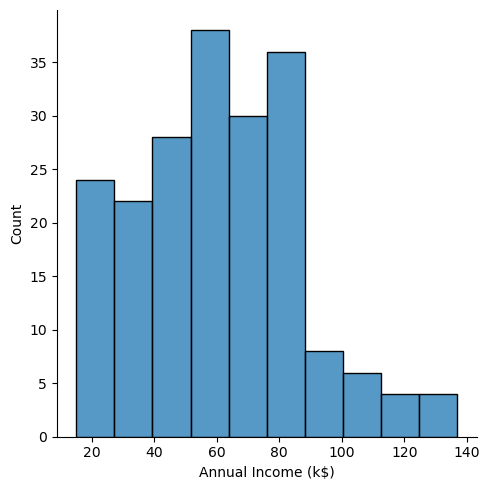

<Figure size 640x480 with 0 Axes>

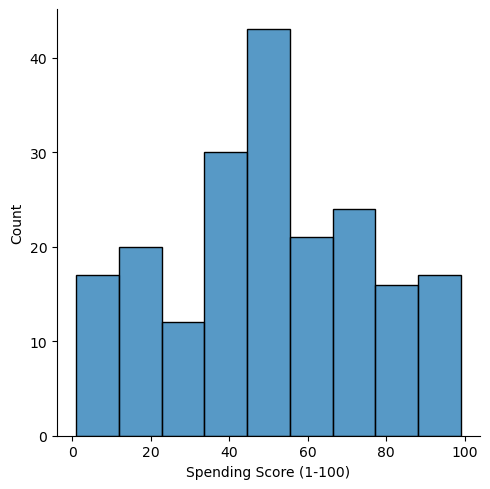

In [9]:
#This code creates a separate distribution plot for each column listed in the columns
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure() #This line creates a new figure for each plot. This ensures that each plot appears in a separate figure window and doesn’t overlap with the others.
    sns.displot(df[i])

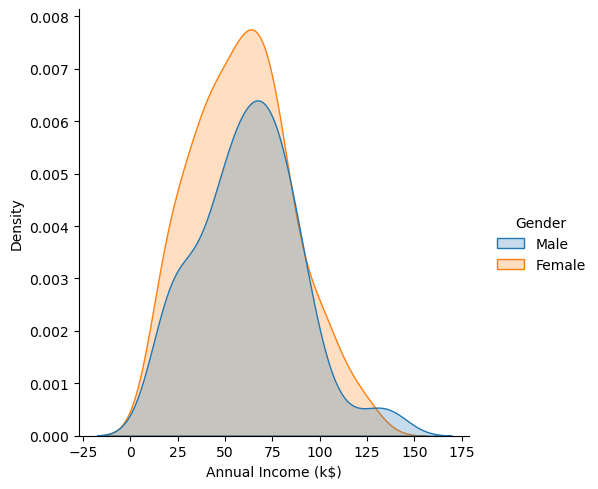

In [15]:
#sns.kdeplot(df['Annual Income (k$)'], shade= True, hue=df['Gender']);
# KDE allows you to visualize the distribution of data points in a smooth, continuous curve, rather than just a histogram's discrete bars.

sns.displot(data=df, x='Annual Income (k$)', hue='Gender', kind='kde', fill=True)
plt.show()

<Figure size 640x480 with 0 Axes>

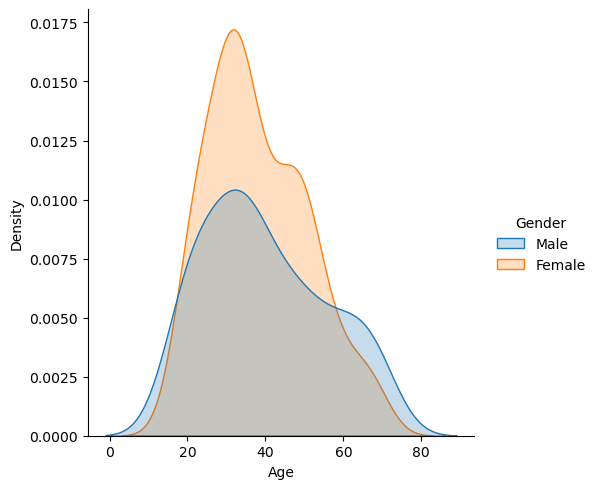

<Figure size 640x480 with 0 Axes>

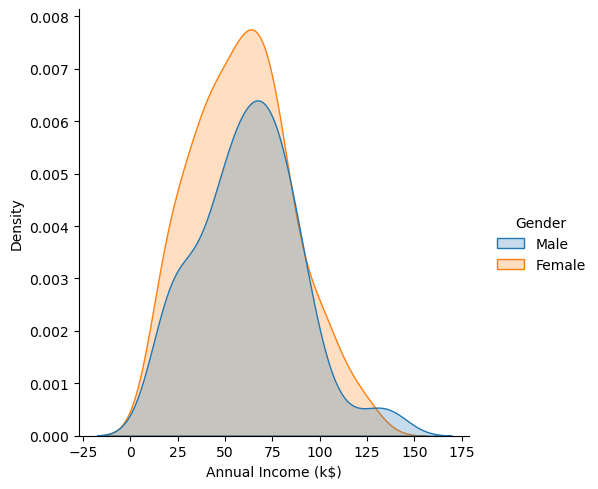

<Figure size 640x480 with 0 Axes>

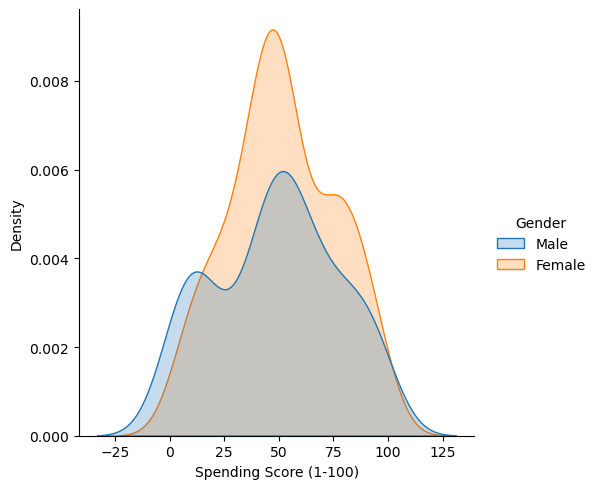

In [18]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure() ##This line creates a new figure for each plot. This ensures that each plot appears in a separate figure window and doesn’t overlap with the others.
    sns.displot(df, x=i, hue='Gender', kind='kde', fill=True)  # Using displot with kind='kde'
    plt.show()

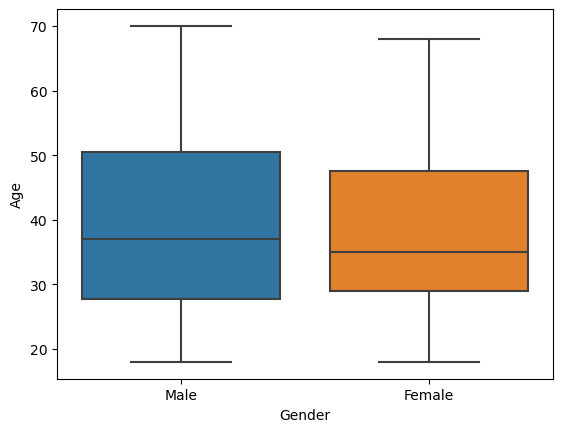

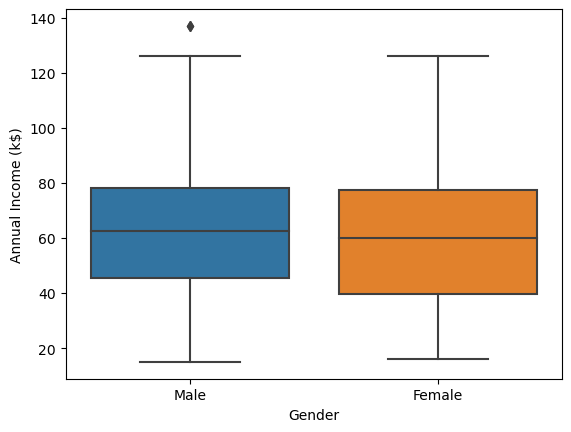

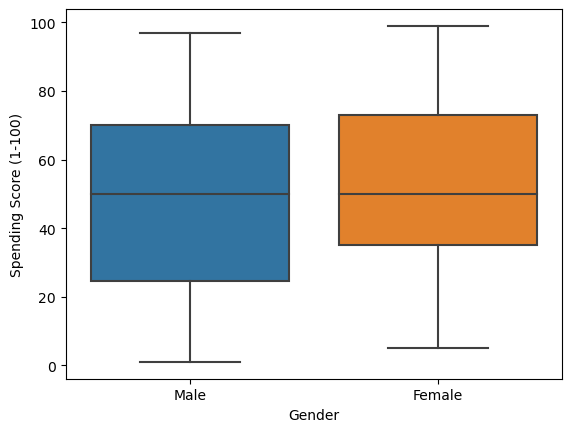

In [20]:
#Boxplot Distribution
#A standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile, median, third quartile, and maximum).
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure() #This creates a new figure for each iteration, ensuring that each plot is displayed separately.
    sns.boxplot(data=df, x='Gender', y=df[i])
    

In [21]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

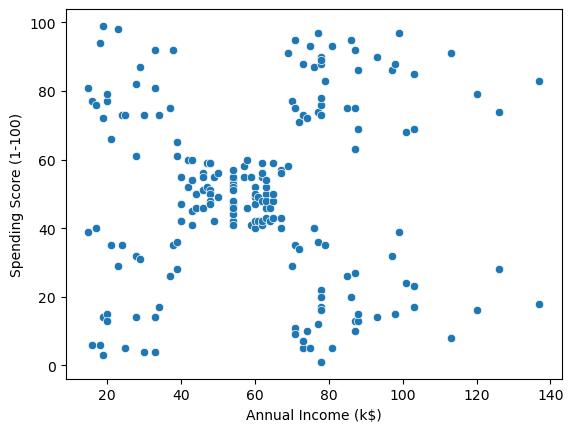

In [22]:
#Scatter plot helps to visualise relationship between two variables
#Each point on the scatter plot represents a single observation (data point) from the dataset.
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

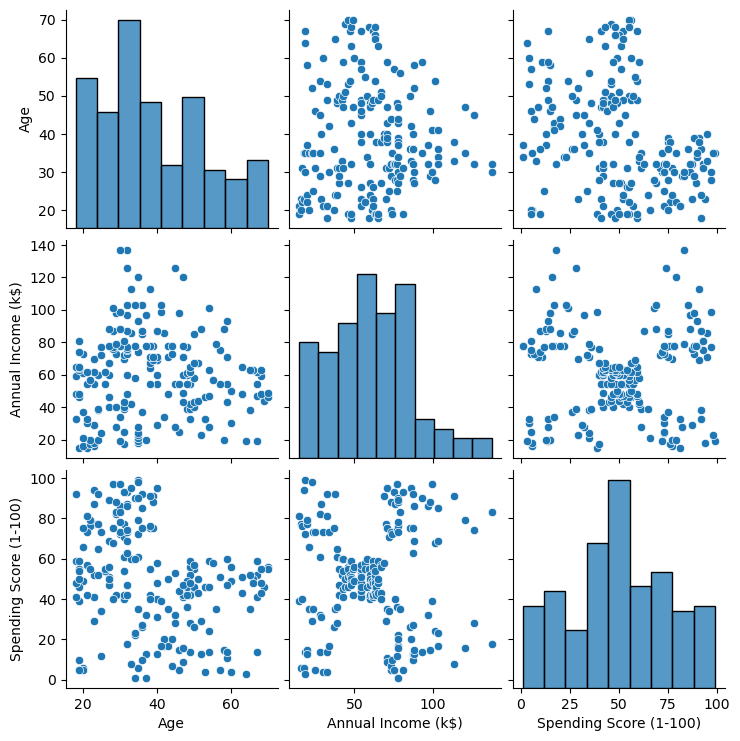

In [24]:
#Helps to visualise relationship between multiple variables in the dataset
#Helps in identifying correlations and relationships between multiple variables
#Helps in plotting trends, clusters or patterns within the dataset
#Dropping customer_id column because it is not adding any value to the data
df=df.drop('CustomerID', axis=1)
sns.pairplot(df)


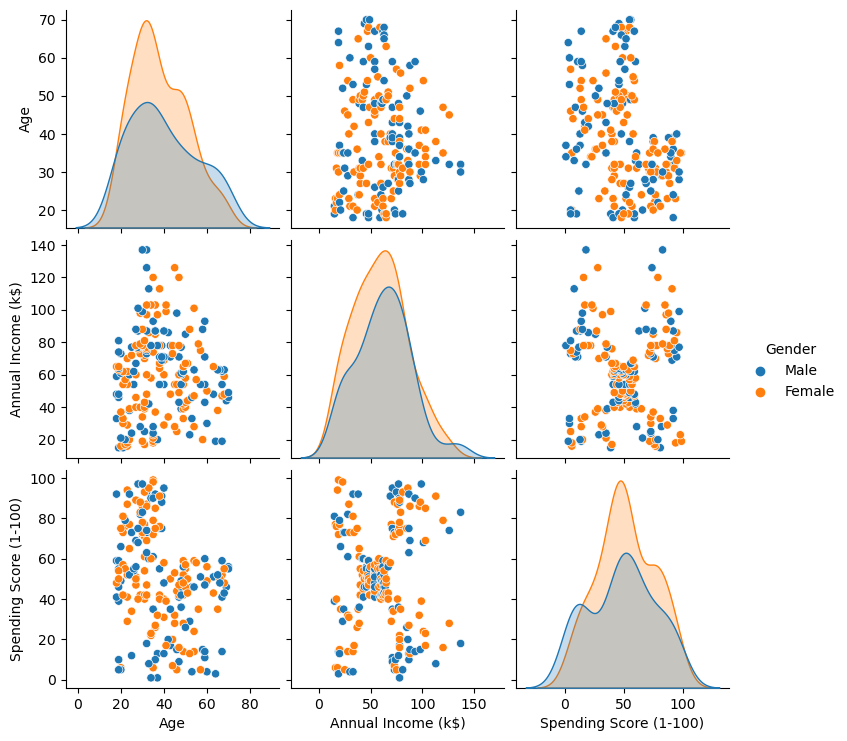

In [25]:
sns.pairplot(df, hue='Gender')

In [27]:
#Calculating the mean values of Age, Annual Income (k$), and Spending Score (1-100) for each gender.
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [28]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

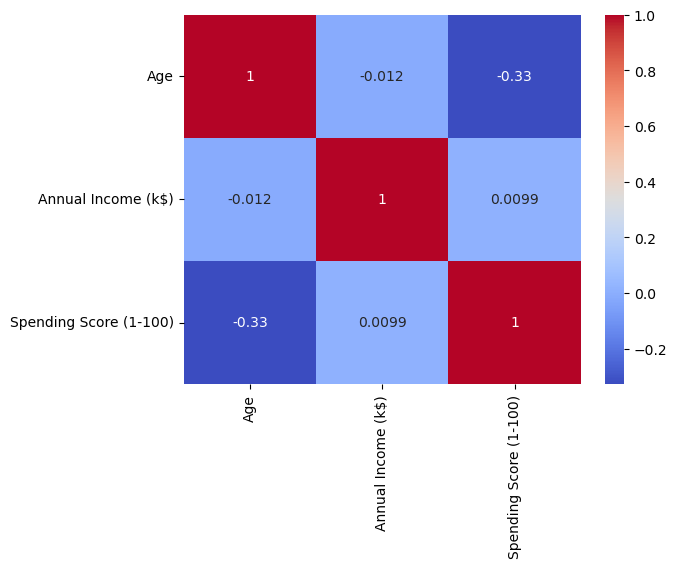

In [29]:
sns.heatmap(df.corr(),annot =True, cmap = 'coolwarm')
#A correlation of 0.0099 between Annual Income & Spending score suggests that there is no meaningful linear connection between "Annual Income" and "Spending Score"

# Clustering - Univariate, Biavariate & Multivariate

# Univariate Clustering

In [59]:
#Initiating the algorithm. However, this initialization doesn't specify the number of clusters (n_clusters) yet. By default, KMeans will use n_clusters=8.
clustering = KMeans(n_clusters = 6)

In [60]:
#Applying clustering algorithm to the data
#Applies K-Means clustering to the Annual Income (k$) column of the dataset.
clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [61]:
#Retrieves the cluster labels assigned to each data point..From 0 to 7 total 8 clusters
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [62]:
#This line creates a new column in the DataFrame df named 'Income Cluster'.
#It assigns the cluster labels obtained from clustering1.labels_ to this new column. 
df['Income Cluster'] = clustering.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster
0,Male,19,15,39,4,1
1,Male,21,15,81,4,1
2,Female,20,16,6,4,1
3,Female,23,16,77,4,1
4,Female,31,17,40,4,1


In [63]:
#Returns a count of the number of data points in each cluster.
#useful for understanding how many data points were assigned to each cluster, helping to gauge the distribution of your clusters.
df['Income Cluster'].value_counts()

1    46
3    44
0    42
4    32
2    28
5     8
Name: Income Cluster, dtype: int64

In [64]:
#To find out the optimal number of clusters we need, we will use standard elbow method
#Inertia is a measure of how well the data points fit into their assigned clusters
#It is the sum of squared distances between each data point and its assigned cluster center 
#A lower inertia value suggests a better clustering solution where points are more similar within clusters
#If you increase the number of clusters, you might find that inertia decreases. This is expected because more clusters can reduce the average distance between points and their centroids
clustering.inertia_

5081.484660267269

In [65]:
#The purpose of this code is to analyze how the inertia score changes with different numbers of clusters. 
inertia_scores=[] #Intialize an empty list to store inertia scores
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']]) #Fit the K-means model to the data
    inertia_scores.append(kmeans.inertia_)

In [66]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3972.3214285714284,
 2841.1487179487185,
 2190.0972210795744,
 1739.5591575091573]

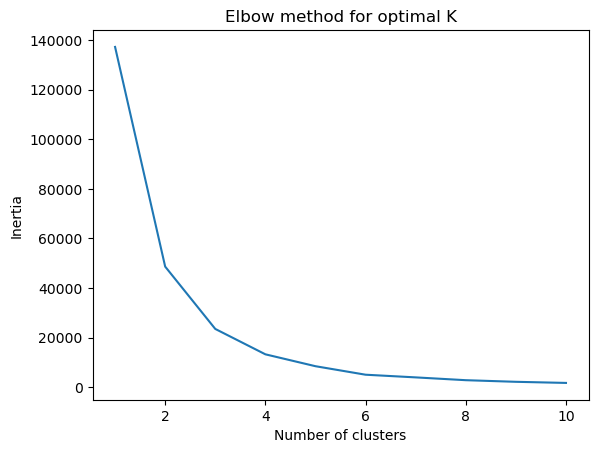

In [67]:
#This line plot will show how the inertia score changes as the number of clusters increases.
plt.plot(range(1,11), inertia_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show()

In [68]:
#The plot of inertia scores against the number of clusters shows a distinct bend or "elbow" at 3 clusters.
#Before 3 clusters, the inertia decreases significantly with each additional cluster.
#After 3 clusters, the decrease in inertia is much slower, indicating that adding more clusters does not improve the model significantly.

In [69]:
#Initialize KMeans with 3 clusters
clustering1 = KMeans(n_clusters = 3)


In [70]:
#Fit the model
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [71]:
#Retrieves the cluster labels assigned to each data point..From 0 to 2 total 3 clusters
clustering2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [72]:
#This line creates a new column in the DataFrame df named 'Income Cluster'.
#It assigns the cluster labels obtained from clustering1.labels_ to this new column. 
df['Income1 Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,2
2,Female,20,16,6,4,2
3,Female,23,16,77,4,2
4,Female,31,17,40,4,2


In [73]:
#Returns a count of the number of data points in each cluster.
#useful for understanding how many data points were assigned to each cluster, helping to gauge the distribution of your clusters.
df['Income1 Cluster'].value_counts()

1    92
2    72
0    36
Name: Income1 Cluster, dtype: int64

In [74]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Income1 Cluster'],
      dtype='object')

In [75]:
df.groupby('Income1 Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income1 Cluster,,,
0,37.833333,99.888889,50.638889
1,39.184783,66.717391,50.054348
2,38.930556,33.027778,50.166667


## Interpretation:
### 1. Cluster 0:
This cluster has a moderate average income and a spending score close to the overall mean.
### 2. Cluster 1:
This cluster has the lowest average income but a spending score slightly above the mean.
### 3. Cluster 2:
This cluster has the highest average income, with a spending score slightly above the overall mean.

## Insights:
### 1. Income Trends:
Cluster 0: Middle-income group.
Cluster 1: Lower-income group.
Cluster 2: High-income group.
### 2. Spending Score:
All clusters have spending scores close to each other, with only slight variations. This suggests that while the income levels vary significantly between clusters, the spending behavior (as measured by the spending score) is relatively consistent.
### 3. Age:
The age distribution is fairly consistent across clusters, with only slight variations in average age.

# Bivariate Clustering

In [76]:

clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2,3
1,Male,21,15,81,4,2,6
2,Female,20,16,6,4,2,3
3,Female,23,16,77,4,2,6
4,Female,31,17,40,4,2,3


In [82]:
inertia_scores2 = []  # Initialize an empty list to store inertia scores
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])  # Fit the K-means model to the data
    inertia_scores2.append(kmeans2.inertia_)  # Store the inertia score

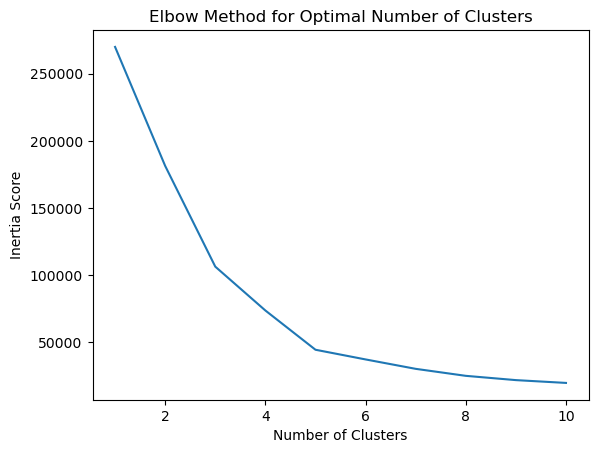

In [83]:
#This line plot will show how the inertia score changes as the number of clusters increases.
plt.plot(range(1, 11), inertia_scores2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [84]:
#The plot of inertia scores against the number of clusters shows a distinct bend or "elbow" at 5 clusters.
#Before 5 clusters, the inertia decreases significantly with each additional cluster.
#After 5 clusters, the decrease in inertia is much slower, indicating that adding more clusters does not improve the model significantly.

In [85]:
#Initialize KMeans with 5 clusters
clustering3 = KMeans(n_clusters = 5)
clustering3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering3.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2,4
1,Male,21,15,81,4,2,1
2,Female,20,16,6,4,2,4
3,Female,23,16,77,4,2,1
4,Female,31,17,40,4,2,4


In [96]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,25.272727,25.727273,79.363636
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


# Interpretation:
Cluster 0: This cluster consists of individuals with relatively high income and average age, but their spending score is quite low.

Cluster 1: This cluster has a younger population with a low income and high spending score, indicating that despite their lower income, they spend a significant proportion of it.

Cluster 2: This cluster has an average age and income with a moderate spending score, suggesting balanced spending behavior relative to their income.

Cluster 3: This cluster has individuals with a relatively high income and high spending score, suggesting that they have substantial disposable income and spend more.

Cluster 4: This cluster has individuals with an older average age, lower income, and low spending score, indicating that despite having a lower income, they are conservative in their spending.

In [91]:
#Finding centers of each identified cluster
centers = pd.DataFrame(clustering3.cluster_centers_)
centers.columns = ['x', 'y']

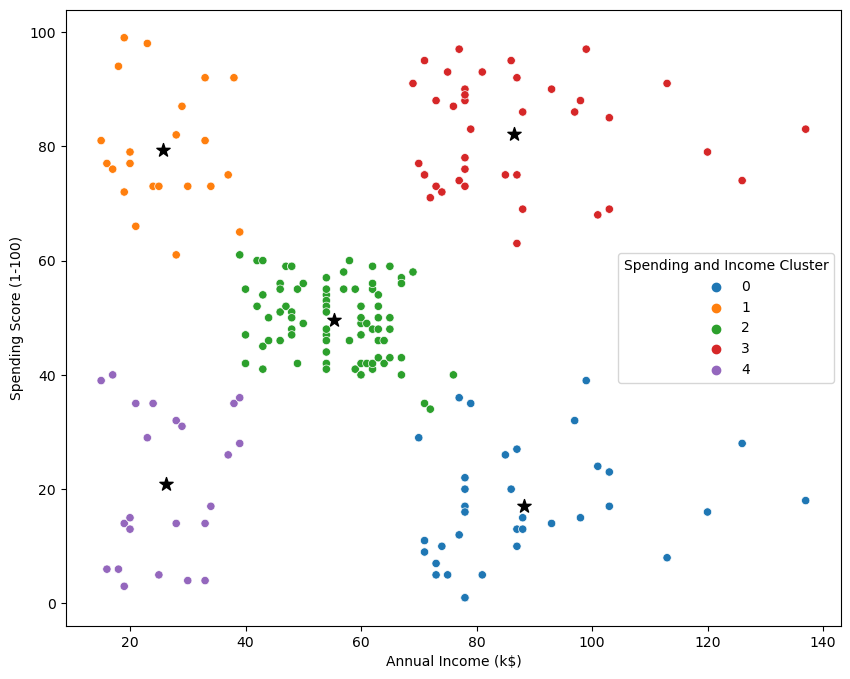

In [117]:
#Analysis on these identified clusters
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_biavariate.png')

In [95]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.590909,0.409091
2,0.592593,0.407407
3,0.538462,0.461538
4,0.608696,0.391304


# Interpretation:
Cluster 0: In this cluster, approximately 45.7% of the individuals are female, and 54.3% are male.

Cluster 1: In this cluster, approximately 59.1% of the individuals are female, and 40.9% are male.

Cluster 2: In this cluster, approximately 59.3% of the individuals are female, and 40.7% are male.

Cluster 3: In this cluster, approximately 53.8% of the individuals are female, and 46.2% are male.

Cluster 4: In this cluster, approximately 60.9% of the individuals are female, and 39.1% are male.

High Income, Low Spending: Cluster 0 and Cluster 3 show high incomes, but Cluster 3 has a high spending score, while Cluster 0 has a low spending score.

Low Income, High Spending: Cluster 1 demonstrates low income but high spending.

Moderate Income and Spending: Cluster 2 shows balanced characteristics.

High Age, Low Spending: Cluster 4 has older individuals with lower income and spending.

# Multivariate Clustering

In [98]:
from sklearn.preprocessing import StandardScaler 
#This class is used for feature scaling, standardizes features by removing the mean and scaling to unit variance



In [99]:
scale = StandardScaler()
#Standardization ensures that each feature contributes equally to the distance calculations in clustering algorithms like KMeans. 
#Features with larger scales or different units can disproportionately affect the results.

In [100]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2,4
1,Male,21,15,81,4,2,1
2,Female,20,16,6,4,2,4
3,Female,23,16,77,4,2,1
4,Female,31,17,40,4,2,4


In [102]:
#This function is used to perform one-hot encoding on categorical variables in a DataFrame
#One-hot encoding transforms categorical variables into binary (0 or 1) columns. 
#Gender_Female and Gender_Male are the dummy variables created from the original Gender column
#Age and Annual Income (k$) remain unchanged because they are numerical features, not categorical
dff = pd.get_dummies(df,drop_first=True) #To ensure that encoded features do not lead to multicollinearity
dff.head()



,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income1 Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,2,4,1
1,21,15,81,4,2,1,1
2,20,16,6,4,2,4,0
3,23,16,77,4,2,1,0
4,31,17,40,4,2,4,0


In [103]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income1 Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [105]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [110]:
dff = pd.DataFrame(scale.fit_transform(dff))
#fit_transform(dff): This operation does two things:
#fit: It calculates the mean and standard deviation of each column in dff.
#transform: It adjusts the data so each column has a mean of 0 and a standard deviation of 1, which is called standardization
#You then convert this scaled data back into a DataFrame format to work with it more easily.
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


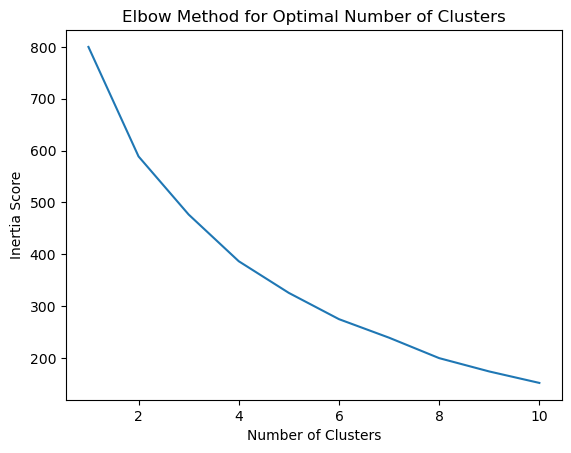

In [112]:
inertia_scores3 = []  # Initialize an empty list to store inertia scores
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)  # Fit the K-means model to the data
    inertia_scores3.append(kmeans3.inertia_)  # Store the inertia score
#This line plot will show how the inertia score changes as the number of clusters increases

plt.plot(range(1, 11), inertia_scores2)
plt.plot(range(1, 11), inertia_scores3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [113]:
#The plot of inertia scores against the number of clusters shows a distinct bend or "elbow" at 4 clusters.
#Before 4 clusters, the inertia decreases significantly with each additional cluster.
#After 4 clusters, the decrease in inertia is much slower, indicating that adding more clusters does not improve the model significantly.

In [114]:
#Initialize KMeans with 4 clusters
clustering4 = KMeans(n_clusters = 4)
clustering4.fit(dff)
dff['Cluster'] = clustering4.labels_
dff.head()

,0,1,2,3,Cluster
0,-1.424569,-1.738999,-0.434801,1.128152,2
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,3
3,-1.137502,-1.700830,1.040418,-0.886405,1
4,-0.563369,-1.662660,-0.395980,-0.886405,1
